In [1]:
import pandas as pd


In [2]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')


In [3]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,...,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0,0,0,0,0,7,...,0,6,0,0,0,0,0,0,0,0
1,35319,0,0,62,0,0,0,0,0,7,...,0,3,1,1,0,0,0,0,0,0
2,BS01,1,0,72,0,1,0,0,0,2,...,0,3,0,0,0,0,0,0,0,0
3,BS-004,1,0,53,0,1,1,0,0,7,...,0,4,0,0,0,0,0,0,0,0
4,BS-005,0,1,58,0,0,0,0,0,7,...,0,3,0,0,0,0,0,0,0,0


In [4]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Rename the feature 'Column1' to 'NewColumn' (modifying in place)
filtered_df.rename(columns={'ArtesunatoevSomministrazione1Datainizioeora': 'Artesunate'}, inplace=True)
filtered_df.rename(columns={'PADHpostartesunatedelayedhaemoly1s': 'PADH'}, inplace=True)


In [6]:
(filtered_df['Altezza'] == 190).sum()

31

In [7]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Pregressamalaria,Profilassi,PAsistolica,PAdiastolica,FC,FR,Altezza,Peso,Temperatura,QTcingresso,QTcdopoACT,QTCdopoultimasomministrazioneartesunato,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,T1Gocciaspessaestriscioperiferico,T1TCtemperaturacorporeainC,T2Gocciaspessaestriscioperiferico,T2TCtemperaturacorporeainC,T3Gocciaspessaestriscioperiferico,T3TCtemperaturacorporeainC,T7Gocciaspessaestriscioperiferico,T7TCtemperaturacorporeainC,Artesunate,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione,Durataricovero,Decesso,ICU,Eventualisequele,PADH,InsorgenzaPADH,SipregadiforniretuttiiparamerivitaliGBincellul,SipregadiforniretuttiiparamerivitaliHbingdl,SipregadiforniretuttiiparamerivitaliPLTincellul,Sipregadiforniretuttiiparamerivitalireticolitiincellul,SipregadiforniretuttiiparamerivitaliLDHinUllcio,SipregadiforniretuttiiparamerivitaliASTUL,SipregadiforniretuttiiparamerivitaliALTUL,SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl,SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl,SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto,Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi,NadirHb,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,117137,1.0,0,0,110,60,65,14,160,55.0,37.8,401,446,441,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,1,36.8,1,36.800000,1,36.900000,0,36.250497,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,4,0,0,0,0,11,7473,8.658614,221779,317786,2696,52,37,2.305597,0.723713,0,1,6.508625,0,6,0,0,0,0,0,0,0,0
1,35319,0,0,62,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,37694,1.0,0,0,140,90,124,14,159,70.0,38.5,364,407,407,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,1,37.5,1,37.409134,1,37.200000,0,36.689978,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,15,0,0,0,0,12,9494,8.769722,248947,144164,1010,45,41,2.441647,0.756944,0,1,6.520012,0,3,1,1,0,0,0,0,0,0
2,BS01,1,0,72,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,7,0.2,1,0,80,60,87,20,175,83.0,39.0,420,412,430,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,37.5,1,37.300000,0,37.000000,0,37.000000,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,5,0,0,0,0,9,5672,8.564969,119810,249584,883,53,47,2.400674,0.749121,0,1,6.574113,0,3,0,0,0,0,0,0,0,0
3,BS-004,1,0,53,0,1,1,0,0,7,0,0,0,0,0,0,1,0,0,0,1,2,1,1,1,0,572000,12.0,0,0,125,85,105,20,177,96.0,40.4,450,458,443,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,39.0,0,36.500000,1,36.580389,0,36.252816,1,0,1,1,1,0,0,0,0,0,0,4,0,0,1,5,0,0,0,1,19,8550,7.800000,249000,241784,1098,35,27,2.064907,0.723337,0,1,7.800000,0,4,0,0,0,0,0,0,0,0
4,BS-005,0,1,58,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,602100,13.5,0,0,107,40,125,16,160,64.3,40.0,451,435,409,2810,4460,14.5,58000,115.0,48.000000,1.30,858,38,37,1.48,1.428358,135

In [8]:
patient_general = ['Codiceidentificativo', 'Sesso', 'Nazionalità', 'Età', 'Domicilio', 'Altezza', 'Peso', 'SubSaharanAfrica', 'Pregressamalaria', 'Profilassi']
comorbidities = ['Comorbilità', 'Diabete', 'HIV', 'IRC']
patient_state_arrival = ['GCS',
 'Prostrazione',
 'Shock',
 'Bleeding',
 'ARDS',
 'Anemia',
 'Creatinina',
 'Glicemia',
 'Acidosi',
 'Bilirubina',
 'Hyperparasitaemia',
 'Numerocriteri']
diagnosis_type = ['Emoscopia', 'NAAT']
diagnosis_result = ['Falciparum',
 'Ovale',
 'Parassitemiavaloreassoluto',
 'Percentualeparassitemia']
baseline_other = ['PAsistolica',
 'PAdiastolica',
 'FC',
 'FR',
 'Temperatura',
 'Ritardoterapeutico']
QTc = ['QTcingresso', 'QTcdopoACT', 'QTCdopoultimasomministrazioneartesunato']
T0 = ['T0GBincellul',
 'T0GRincellul',
 'T0Hbingdl',
 'T0PLTincellul',
 'T0Glicemiainmgdl',
 'T0Azotemiainmgdl',
 'T0Creatininainmgdl',
 'T0LDHinUL',
 'T0ASTinUL',
 'T0ALTinUL',
 'T0Bilirubinatotinmgdl',
 'T0Bilirubinadirettainmgdl',
 'T0SodioinmEql',
 'T0PotassioinmEql',
 'T0Cainmgdl',
 'T0INR',
 'T0fibrinogenoinmgdl',
 'T0pH',
 'T0bicarbonatiinmmoll',
 'T0Lattatiinmmoll']
T1 = ['T1Gocciaspessaestriscioperiferico', 'T1TCtemperaturacorporeainC']
T2 = ['T2Gocciaspessaestriscioperiferico', 'T2TCtemperaturacorporeainC']
T3 = ['T3Gocciaspessaestriscioperiferico', 'T3TCtemperaturacorporeainC']
T7 = ['T7Gocciaspessaestriscioperiferico', 'T7TCtemperaturacorporeainC']
treatment = ['Artesunate',
 'ArtemetherLumefantrinaSomministrazione1Datainizioeora',
 'DiidroartemisininaPiperachinaSomministrazione1Datainizioeora',
 'ACT',
 'ArtesunatoACT',
 'AtovaquoneProguanile',
 'Doxiciclinaperos',
 'Clindamicina',
 'Antibiotici',
 'Chinino',
 'Primachina',
 'DurataArtesunato']
outcome = ['Durataricovero',
 'Decesso',
 'ICU',
 'Eventualisequele',
 'PADH',
 'InsorgenzaPADH',
 'PermanenzainTerapiaIntensivagiorni',
 'TrasferimentoinRianimazioneancheinaltrocentro',
 'Guarigione']
PADH_info = ['InsorgenzaPADH',
 'SipregadiforniretuttiiparamerivitaliGBincellul',
 'SipregadiforniretuttiiparamerivitaliHbingdl',
 'SipregadiforniretuttiiparamerivitaliPLTincellul',
 'Sipregadiforniretuttiiparamerivitalireticolitiincellul',
 'SipregadiforniretuttiiparamerivitaliLDHinUllcio',
 'SipregadiforniretuttiiparamerivitaliASTUL',
 'SipregadiforniretuttiiparamerivitaliALTUL',
 'SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl',
 'SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl',
 'Sipregadiforniretuttiiparamerivitaliaptoglobinainmgdl',
 'SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto',
 'Sipregadiforniretuttiiparamerivitalitestdicoombsindiretto',
 'Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi',
 'NadirHb',
 'Trasfusione',
 'Unitàtrasfuse']
follow_up = ['Altrieventiavversi',
 'Diarreaedisidratazione',
 'Ipertransaminasemiatardiva',
 'Polmonite',
 'IVUnosocomiale',
 'Esofagite',
 'Dispepsia',
 'Tachiaritmiasopraventricolare']

***Restrict the dataframe to only the patients who got administrated Artsunate***

In [9]:
artsnt_df = filtered_df[filtered_df['Artesunate'] == 1]

In [10]:
print('filtered_df len : ' + str(len(filtered_df))+' // artsnt len : '+str(len(artsnt_df)))

filtered_df len : 72 // artsnt len : 55


In [11]:
artsnt_df['PADH'].sum()

8

C:\Users\balth\AppData\Local\Temp/ipykernel_25196/2274167390.py:20: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if artsnt_df[feature].dtype != np.object:  # Check if the feature is not a string
C:\Users\balth\AppData\Local\Temp/ipykernel_25196/2274167390.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels


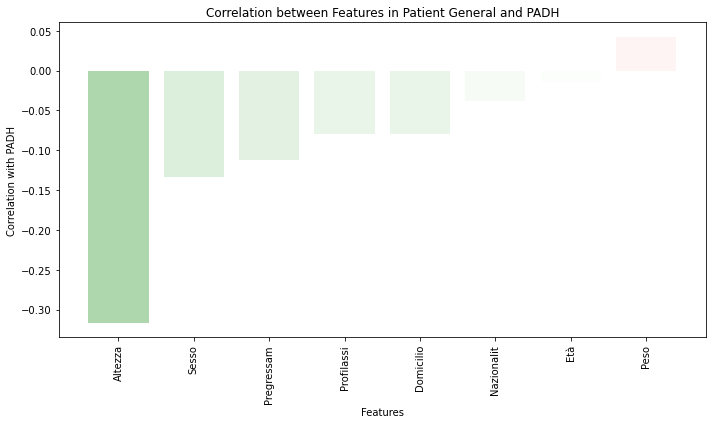

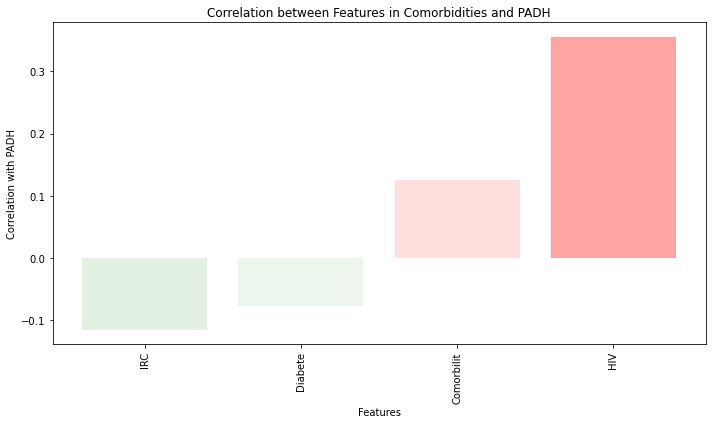

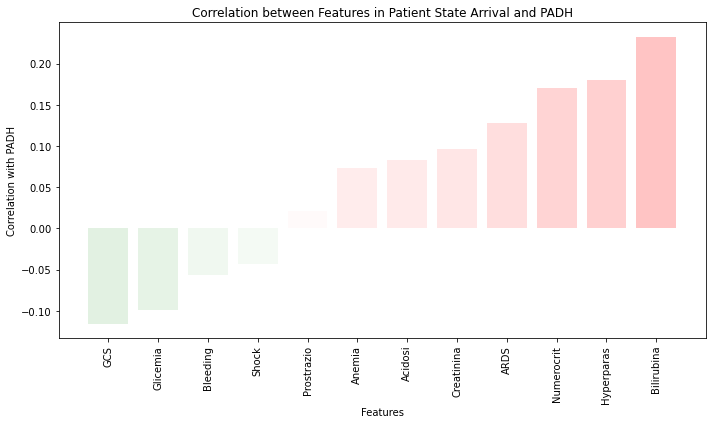

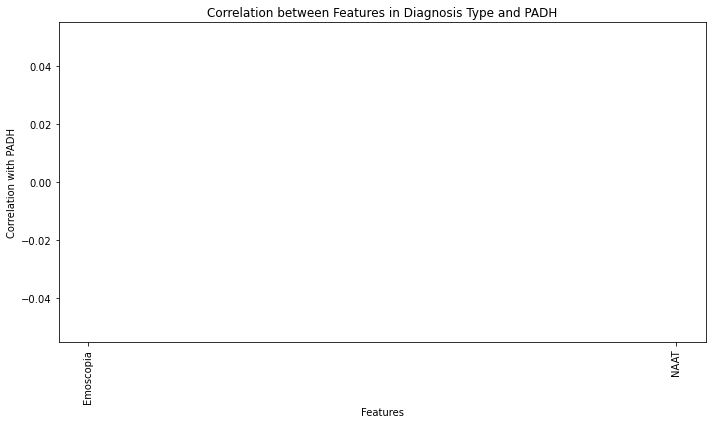

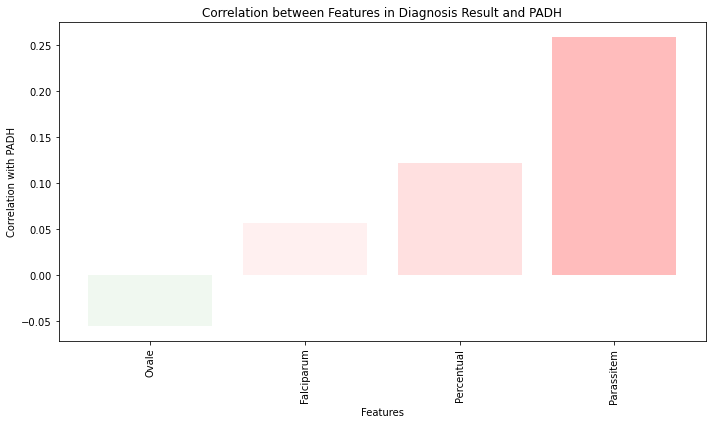

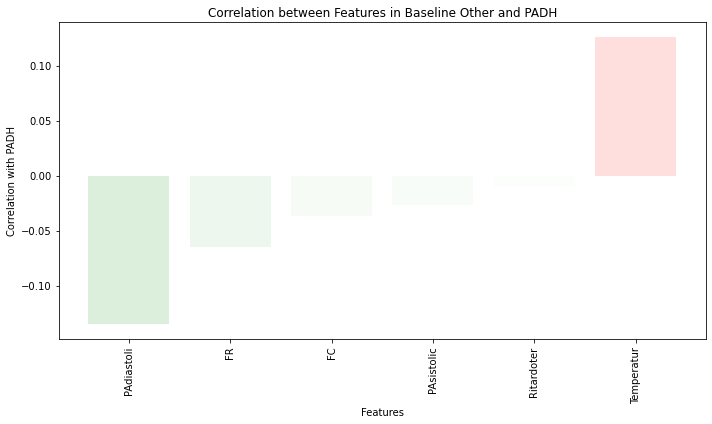

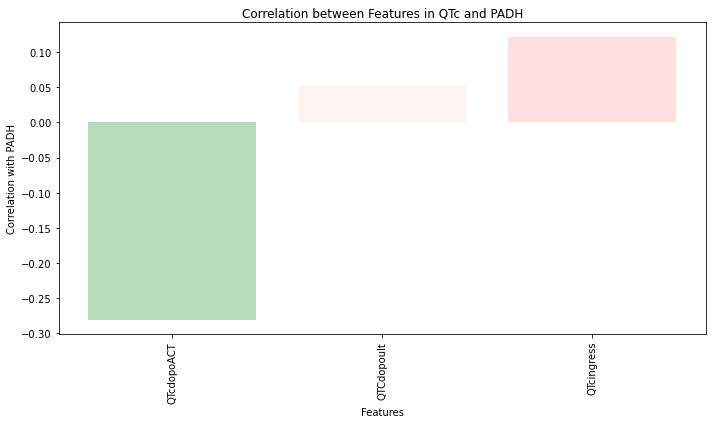

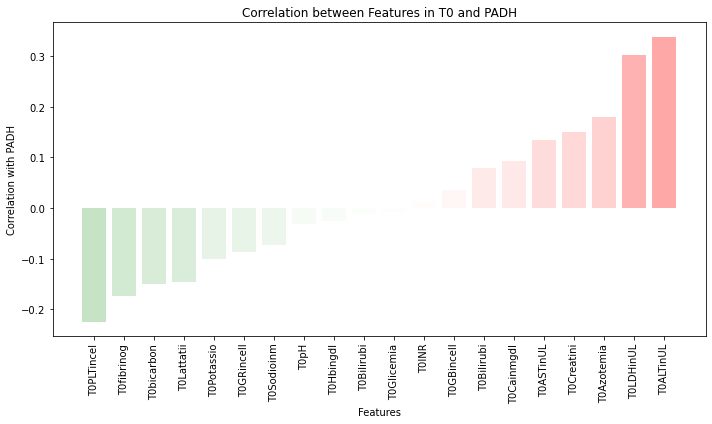

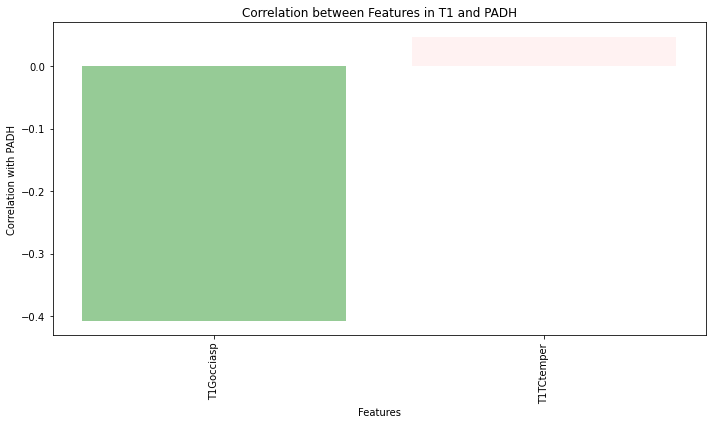

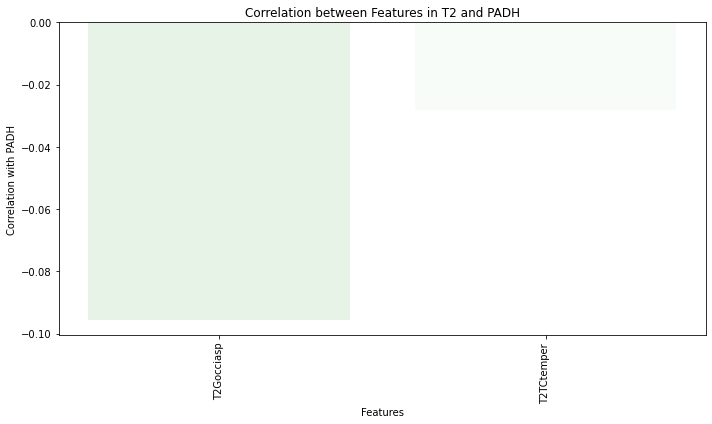

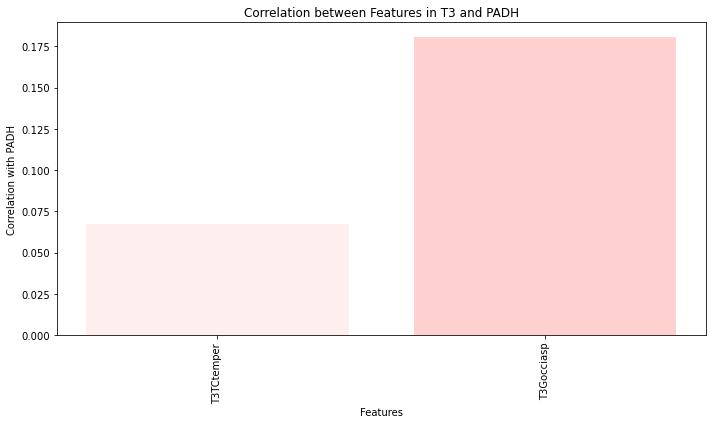

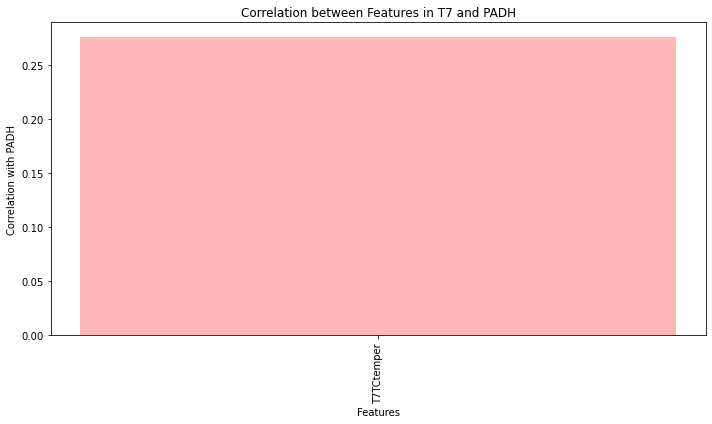

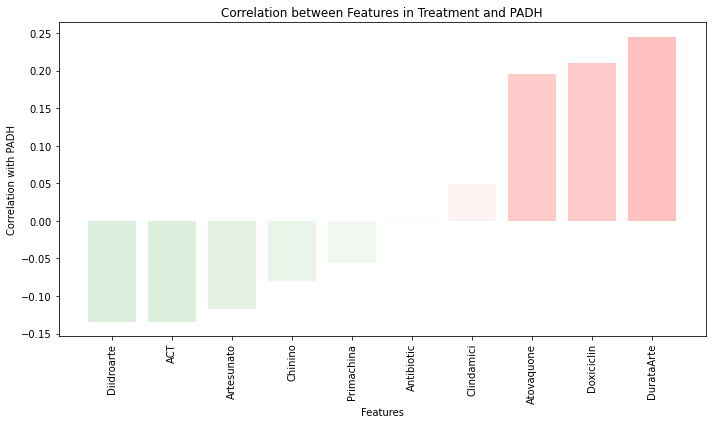

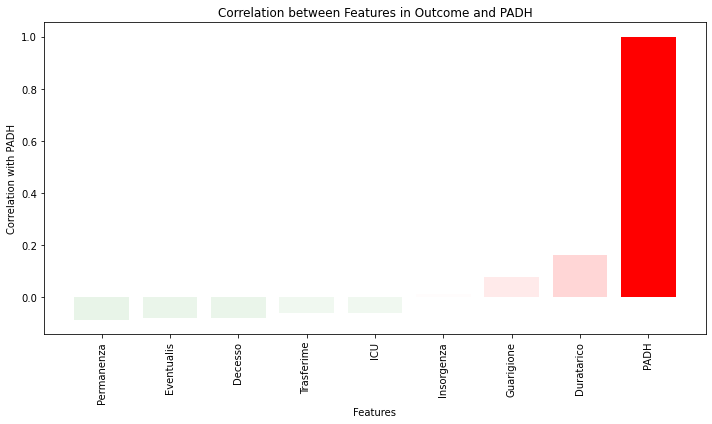

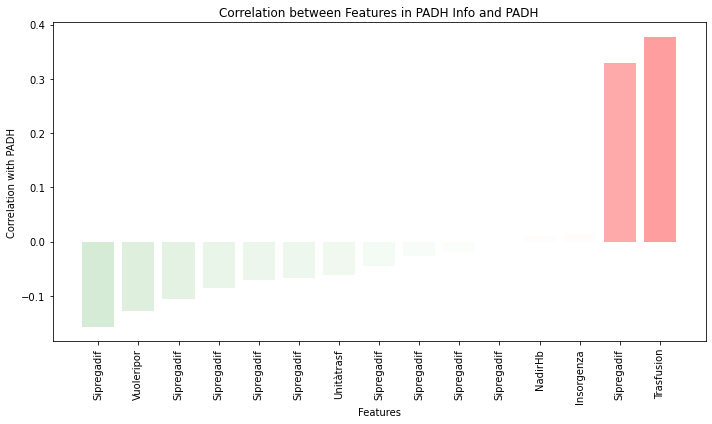

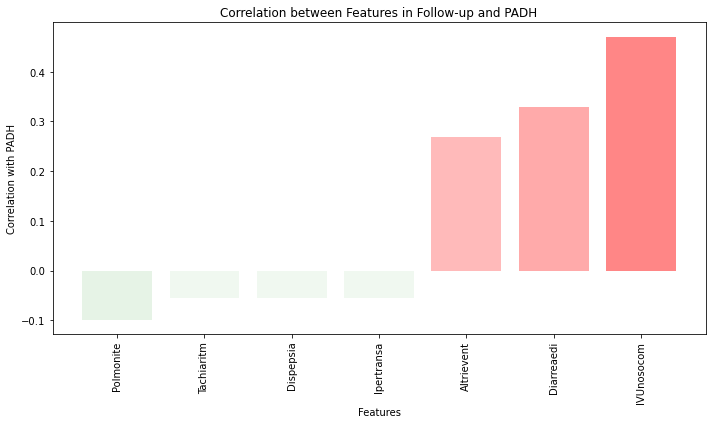

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Define the category lists
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]
category_names = ['Patient General', 'Comorbidities', 'Patient State Arrival', 'Diagnosis Type', 'Diagnosis Result', 'Baseline Other', 'QTc', 'T0', 'T1', 'T2', 'T3', 'T7', 'Treatment', 'Outcome', 'PADH Info', 'Follow-up']

# Get the 'PADH' column from artsnt_df
target_column = artsnt_df['PADH']

# Iterate over each category
for category, category_name in zip(categories, category_names):
    # Filter the features based on the current category
    features = [feature for feature in artsnt_df.columns if feature in category]

    # Calculate the correlation between each feature and PADH
    correlations = []
    for feature in features:
        if artsnt_df[feature].dtype != np.object:  # Check if the feature is not a string
            correlation = artsnt_df[feature].corr(target_column)
            correlations.append((feature, correlation))

    # Sort the correlation values in ascending order
    correlations.sort(key=lambda x: x[1])

    # Prepare colors for the bars based on correlation values
    cmap = colors.LinearSegmentedColormap.from_list('correlation_cmap', ['green', 'white', 'red'])
    norm = colors.Normalize(vmin=-1, vmax=1)

    # Plot the correlation values on a bar chart with colored bars
    plt.figure(figsize=(10, 6))
    features, correlation_values = zip(*correlations)
    bar_colors = cmap(norm(correlation_values))
    plt.bar(features, correlation_values, color=bar_colors)
    plt.xlabel('Features')
    plt.ylabel('Correlation with PADH')
    plt.title(f'Correlation between Features in {category_name} and PADH')
    plt.xticks(rotation=90)
    plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels
    plt.tight_layout()
    plt.show()


In [13]:
patient_general_noID = ['Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']

# And we will only keep the features that do not introduce "bias" in our graphe
predictive_categories = [patient_general_noID, comorbidities, patient_state_arrival, diagnosis_result, baseline_other, T0, treatment]

In [14]:
# Create an empty list to store selected feature names
selected_features = []

# Iterate over predictive_categories
for category in predictive_categories:
    # Check if any column in artsnt_df is present in the current category
    selected_features.extend([feature for feature in artsnt_df.columns if feature in category])

# Create predictive_df DataFrame with selected features
predictive_artsnt_df = artsnt_df[selected_features]


In [15]:
correlations = []

# Iterate over selected features
for feature in selected_features:
    # Calculate correlation between the selected feature and "PADH"
    correlation = artsnt_df[feature].corr(artsnt_df["PADH"])
    correlations.append((feature, correlation))

# Sort the correlations in descending order based on absolute values
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature/correlation pairs
for feature, correlation in correlations:
    print(f"Feature: {feature}, Correlation with PADH: {correlation}")


Feature: HIV, Correlation with PADH: 0.35509309691134033
Feature: T0ALTinUL, Correlation with PADH: 0.3385418721942792
Feature: Altezza, Correlation with PADH: -0.31674852585348623
Feature: T0LDHinUL, Correlation with PADH: 0.30223962439678437
Feature: Parassitemiavaloreassoluto, Correlation with PADH: 0.25878013196266764
Feature: T0PLTincellul, Correlation with PADH: -0.22431662235398095
Feature: Artesunate, Correlation with PADH: nan
Feature: ArtemetherLumefantrinaSomministrazione1Datainizioeora, Correlation with PADH: nan
Feature: DurataArtesunato, Correlation with PADH: 0.24521236523627749
Feature: Bilirubina, Correlation with PADH: 0.23247373159367563
Feature: Doxiciclinaperos, Correlation with PADH: 0.21053798026662976
Feature: AtovaquoneProguanile, Correlation with PADH: 0.19535195055208465
Feature: Hyperparasitaemia, Correlation with PADH: 0.1804987180952889
Feature: T0Azotemiainmgdl, Correlation with PADH: 0.1795207899896779
Feature: T0fibrinogenoinmgdl, Correlation with PADH:

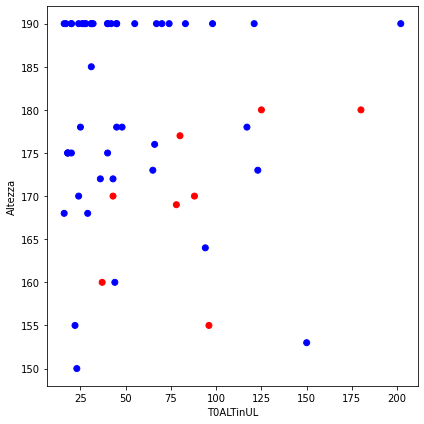

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_artsnt_df['T0ALTinUL']
feature2 = predictive_artsnt_df['Altezza']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('T0ALTinUL')
plt.ylabel('Altezza')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


In [17]:
(artsnt_df['Altezza'] == 190).sum()

24